<h1>New Dataset Creation</h1>

Names:
* Luís Aguirre
* Viviane Todt

#### Atributes:



In [18]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm_api
from statsmodels.formula.api import ols as sm_ols
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression  

#### 1. Preprocessing

In [23]:
data = pd.read_csv("NewDataset.csv")
data.keys()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 8 columns):
Date                   1727 non-null int64
Tsunami                1727 non-null int64
Magma_Lava Flow        1727 non-null int64
Fuming_Level           1727 non-null int64
Seismic_Signal         1727 non-null int64
Gas_Emission           1727 non-null int64
Aviation_Color_Code    1727 non-null int64
Volcano_Alert_Level    1727 non-null int64
dtypes: int64(8)
memory usage: 108.0 KB
None


In [20]:
data.head()

,Date,Tsunami,Magma_Lava Flow,Fuming_Level,Seismic_Signal,Gas_Emission,Aviation_Color_Code,Volcano_Alert_Level
0,1262304000,0,2,1,0,2,2,2
1,1262390400,0,2,1,0,2,2,2
2,1262476800,0,2,1,0,2,2,2
3,1262563200,0,2,1,0,2,2,2
4,1262649600,0,2,1,0,2,2,2


In [24]:
data.describe()

,Date,Tsunami,Magma_Lava Flow,Fuming_Level,Seismic_Signal,Gas_Emission,Aviation_Color_Code,Volcano_Alert_Level
count,1.727000e+03,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,1.337190e+09,0.000579,2.001158,1.001158,0.022003,2.005211,2.001158,2.018529
std,4.324166e+07,0.024063,0.034021,0.034021,0.205887,0.072022,0.034021,0.134894
min,1.262304e+09,0.000000,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000
25%,1.299758e+09,0.000000,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000
50%,1.337299e+09,0.000000,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000
75%,1.374581e+09,0.000000,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000
max,1.412208e+09,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000


#### Correlation

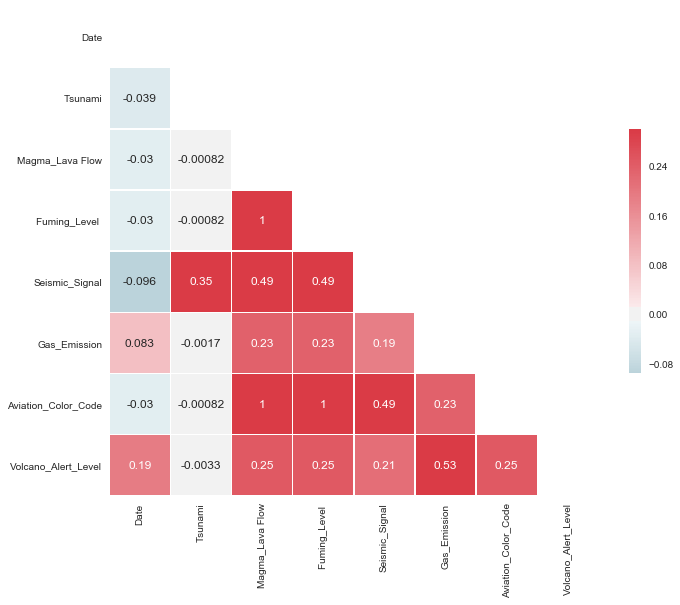

In [25]:
sns.set(style="white")

# Generate a large random dataset

d = pd.DataFrame(data=data)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Deliberation

* Some attributes aren't so important to predic the status. So they 'll be removed in a future predict solution
* When the value is closer han Zero, less important It is

In [27]:
corr.sort_values('Volcano_Alert_Level', ascending=[False])

,Date,Tsunami,Magma_Lava Flow,Fuming_Level,Seismic_Signal,Gas_Emission,Aviation_Color_Code,Volcano_Alert_Level
Volcano_Alert_Level,0.190416,-0.003307,0.247817,0.247817,0.214784,0.526768,0.247817,1.000000
Gas_Emission,0.082590,-0.001742,0.233991,0.233991,0.187622,1.000000,0.233991,0.526768
Magma_Lava Flow,-0.029756,-0.000820,1.000000,1.000000,0.492655,0.233991,1.000000,0.247817
Fuming_Level,-0.029756,-0.000820,1.000000,1.000000,0.492655,0.233991,1.000000,0.247817
Aviation_Color_Code,-0.029756,-0.000820,1.000000,1.000000,0.492655,0.233991,1.000000,0.247817
Seismic_Signal,-0.095659,0.348258,0.492655,0.492655,1.000000,0.187622,0.492655,0.214784
Date,1.000000,-0.038955,-0.029756,-0.029756,-0.095659,0.082590,-0.029756,0.190416
Tsunami,-0.038955,1.000000,-0.000820,-0.000820,0.348258,-0.001742,-0.000820,-0.003307
